#### Download Link for Harrcascade files

1) https://github.com/opencv/opencv/tree/master/data/haarcascades




#### Working of HaarCascade
https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html

1) Internally it uses AdaBoost

#### Notes
1) Haarcascade files can detect single or multiple occurences of an object from an image of varying shapes and sizes.

2) <b>detectMultiScale()</b> - Detects single or multiple occurrence of an object of different sizes in the input image. The detetced features are returned as coordinates.

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
# E:\Img_datasets\haarcascade_files
print('hello \nworld')

hello 
world


In [10]:
face_cascade = cv2.CascadeClassifier("E:\\Img_datasets\\haarcascade_files\\haarcascade_frontalface_alt.xml")
eye_cascade = cv2.CascadeClassifier("E:\\Img_datasets\\haarcascade_files\\haarcascade_eye.xml")

#### Face Detection  

In [12]:
def face_detect(img):
    faces = face_cascade.detectMultiScale(img)
    for (x,y,w,h) in faces:
        print(x,y,w,h)
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
    plt.imshow(img)
    plt.show()

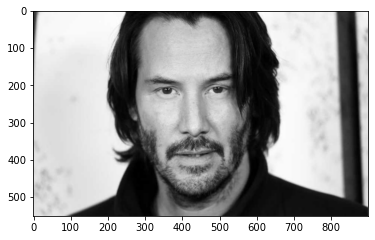

In [13]:
w1 = cv2.imread('kneau.jpg')
plt.imshow(w1)
plt.show()

244 71 379 379


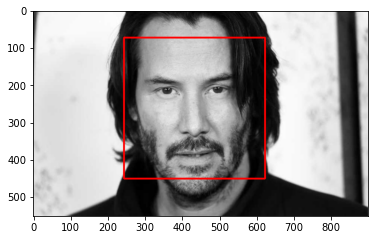

In [14]:
face_detect(w1)

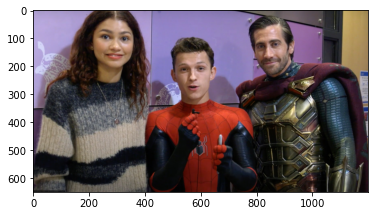

In [15]:
w2 = cv2.imread('face2.jpg')
w2 = cv2.cvtColor(w2,cv2.COLOR_BGR2RGB)
plt.imshow(w2)
plt.show()

208 31 172 172
495 151 156 156
765 65 158 158


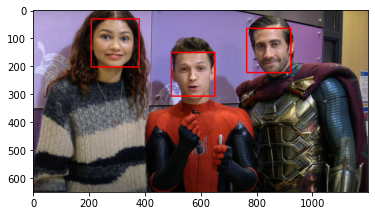

In [16]:
face_detect(w2)

### Eye-Detection

In [18]:
def eye_detect(img):
    eyes = eye_cascade.detectMultiScale(img)
    for (ex,ey,ew,eh) in eyes:
        print(ex,ey,ew,eh)
        img = cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,0,255),3)
    plt.imshow(img)
    plt.show()

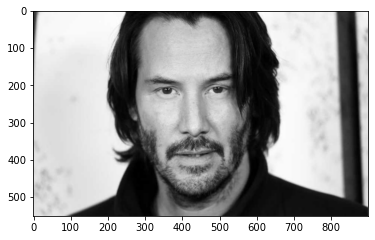

In [20]:
m1 = cv2.imread('kneau.jpg')
plt.imshow(m1)
plt.show()

456 175 75 75
323 179 69 69


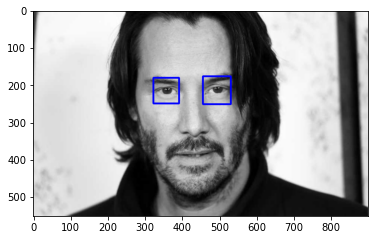

In [21]:
eye_detect(m1)

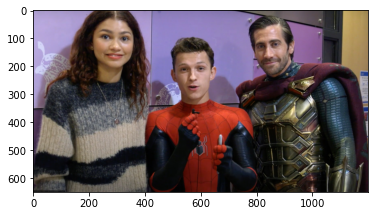

In [23]:
m2 = cv2.imread('face2.jpg')
m2 = cv2.cvtColor(m2,cv2.COLOR_BGR2RGB)
plt.imshow(m2)
plt.show()

576 187 44 44
522 194 35 35
238 73 47 47
307 82 40 40
843 99 46 46
800 114 32 32
225 252 23 23
564 278 24 24


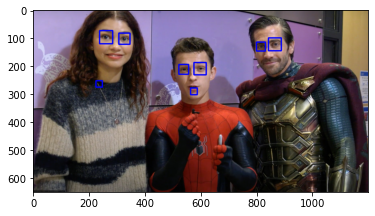

In [24]:
eye_detect(m2)

### Face_eye_detect

In [25]:
def detect_face_eye(img):
    faces = face_cascade.detectMultiScale(img)
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
        fbound = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(fbound)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(fbound,(ex,ey),(ex+ew,ey+eh),(0,0,255),3)
    plt.imshow(img)
    plt.show()

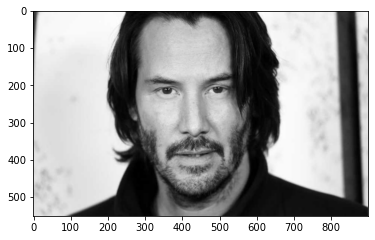

In [26]:
k1 = cv2.imread('kneau.jpg')
plt.imshow(k1)
plt.show()

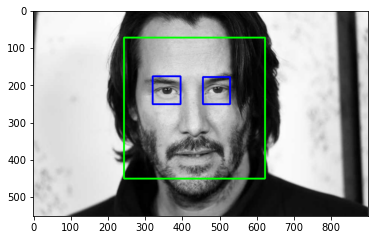

In [27]:
detect_face_eye(k1)

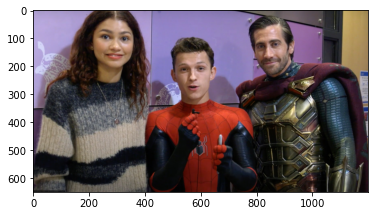

In [28]:
k2 = cv2.imread('face2.jpg')
k2 = cv2.cvtColor(k2,cv2.COLOR_BGR2RGB)
plt.imshow(k2)
plt.show()

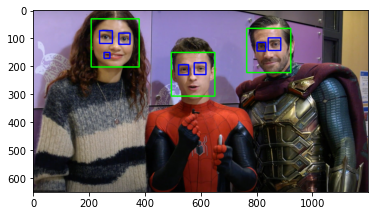

In [29]:
detect_face_eye(k2)

### Open a webcam

In [32]:
print(ord('q'))

113


In [33]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    cv2.imshow('Frame',frame)
    
    k = cv2.waitKey(10)
    if k == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

### Read a recorded video

In [ ]:
cap = cv2.VideoCapture('abc.mp4')

while True:
    _, frame = cap.read()
    cv2.imshow('Frame',frame)
    
    k = cv2.waitKey(10)
    if k == 27:  # Esc
        break
    
cap.release()
cv2.destroyAllWindows()

### Face Detection in Real Time

In [34]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [35]:
face_cascade = cv2.CascadeClassifier("E:\\Img_datasets\\haarcascade_files\\haarcascade_frontalface_alt.xml")
eye_cascade = cv2.CascadeClassifier("E:\\Img_datasets\\haarcascade_files\\haarcascade_eye.xml")

# reading the input image now
cap = cv2.VideoCapture(0)
# while cap.isOpened():
while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    for (x,y, w, h) in faces:
        cv2.rectangle(frame, pt1 = (x,y),pt2 = (x+w, y+h), color = (255,0,0),thickness =  3)
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 5)
    
    cv2.imshow("window", frame)
    k = cv2.waitKey(10)
    if k == ord('q'):
        break
        
# frame.release()
cap.release()
cv2.destroyAllWindows()